In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_NIR_DIST_3b.csv")

In [2]:
info_A1.drop(columns=['thnoth_name_encoded'], inplace=True)

In [3]:
# Delete the specified columns
info_A1 = info_A1.drop(columns=['country_char'])

# Rename the column 'wavenumber' to 'sample_code'
info_A1 = info_A1.rename(columns={'wavenumber': 'sample_code'})

# Display the first few rows of the modified info_A1frame
print(info_A1.head())

  prov_char          sample_code     11544     11540     11536     11532  \
0       KAX  ID-KAX-088-2401-001  0.290252  0.290122  0.290044  0.290029   
1       KBX  ID-KBX-068-2306-003  0.522845  0.522798  0.522826  0.522669   
2       BBX  ID-BBX-095-2401-004 -0.144108 -0.144008 -0.143893 -0.143777   
3       SUX  ID-SUX-074-2311-001  0.333905  0.333777  0.333785  0.333700   
4       SUX  ID-SUX-073-2311-001  1.522433  1.521460  1.521133  1.521072   

      11528     11524     11520     11516  ...      3968      3964      3960  \
0  0.290042  0.289978  0.289851  0.289798  ...  3.572119  3.558086  3.542757   
1  0.522414  0.522217  0.522070  0.521891  ...  3.678293  3.680422  3.655416   
2 -0.143686 -0.143667 -0.143678 -0.143627  ...  3.663113  3.650478  3.623180   
3  0.333522  0.333453  0.333446  0.333381  ...  3.640250  3.601331  3.566453   
4  1.521494  1.522300  1.521840  1.519873  ...  4.108162  4.103365  4.125110   

       3956      3952  tgp_name  dgp_name  fgp_name  country_n

In [4]:
import numpy as np

# Function to remove outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers(info_A1)

# Identify numeric and string columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
string_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

Section 2: Initial Clustering and Evaluation (2 cluster)

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Function to evaluate clustering results
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_score, ch_score = -1, float('inf'), 0
    return silhouette, db_score, ch_score

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)
kmeans_silhouette, kmeans_db_score, kmeans_ch_score = evaluate_clustering(kmeans_clusters, scaled_data)

print(f'KMeans Silhouette Score: {kmeans_silhouette}')
print(f'KMeans Davies-Bouldin Index: {kmeans_db_score}')
print(f'KMeans Calinski-Harabasz Index: {kmeans_ch_score}')

# Hierarchical Clustering
hca = AgglomerativeClustering(n_clusters=2)
hca_clusters = hca.fit_predict(scaled_data)
hca_silhouette, hca_db_score, hca_ch_score = evaluate_clustering(hca_clusters, scaled_data)

print(f'Hierarchical Clustering Silhouette Score: {hca_silhouette}')
print(f'Hierarchical Clustering Davies-Bouldin Index: {hca_db_score}')
print(f'Hierarchical Clustering Calinski-Harabasz Index: {hca_ch_score}')

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)
dbscan_silhouette, dbscan_db_score, dbscan_ch_score = evaluate_clustering(dbscan_clusters, scaled_data)

print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'DBSCAN Davies-Bouldin Index: {dbscan_db_score}')
print(f'DBSCAN Calinski-Harabasz Index: {dbscan_ch_score}')

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(scaled_data)
gmm_silhouette, gmm_db_score, gmm_ch_score = evaluate_clustering(gmm_clusters, scaled_data)

print(f'GMM Silhouette Score: {gmm_silhouette}')
print(f'GMM Davies-Bouldin Index: {gmm_db_score}')
print(f'GMM Calinski-Harabasz Index: {gmm_ch_score}')

# Spectral Clustering
spectral = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=42)
spectral_clusters = spectral.fit_predict(scaled_data)
spectral_silhouette, spectral_db_score, spectral_ch_score = evaluate_clustering(spectral_clusters, scaled_data)

print(f'Spectral Clustering Silhouette Score: {spectral_silhouette}')
print(f'Spectral Clustering Davies-Bouldin Index: {spectral_db_score}')
print(f'Spectral Clustering Calinski-Harabasz Index: {spectral_ch_score}')


KMeans Silhouette Score: 0.6716450034822967
KMeans Davies-Bouldin Index: 0.4673806720586166
KMeans Calinski-Harabasz Index: 3074.4272617235065
Hierarchical Clustering Silhouette Score: 0.6325598149589099
Hierarchical Clustering Davies-Bouldin Index: 0.41834839125180584
Hierarchical Clustering Calinski-Harabasz Index: 2015.5309897203188
DBSCAN Silhouette Score: -1
DBSCAN Davies-Bouldin Index: inf
DBSCAN Calinski-Harabasz Index: 0
GMM Silhouette Score: 0.6623073665817809
GMM Davies-Bouldin Index: 0.44373730232658715
GMM Calinski-Harabasz Index: 2774.0680637154155
Spectral Clustering Silhouette Score: -0.15028273460000996
Spectral Clustering Davies-Bouldin Index: 2.5863595258977927
Spectral Clustering Calinski-Harabasz Index: 0.40327294248622714


Section 5: Visualization of Clustering Results

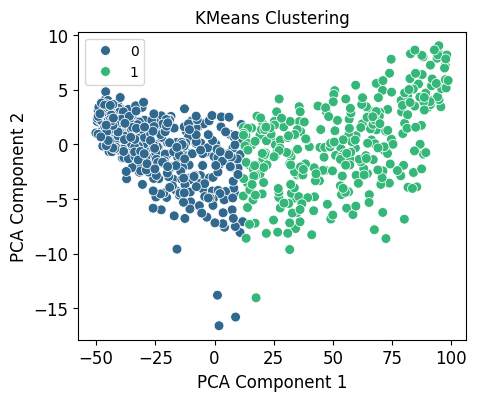

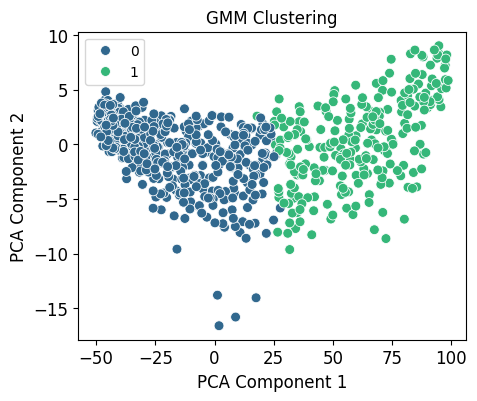

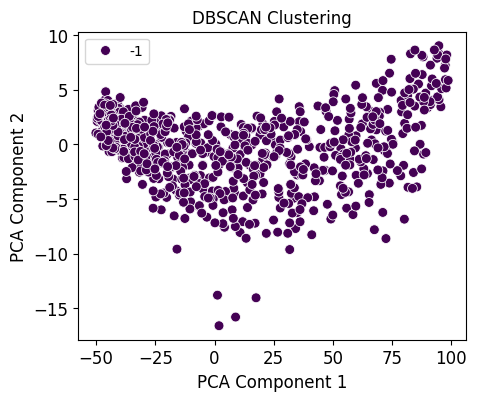

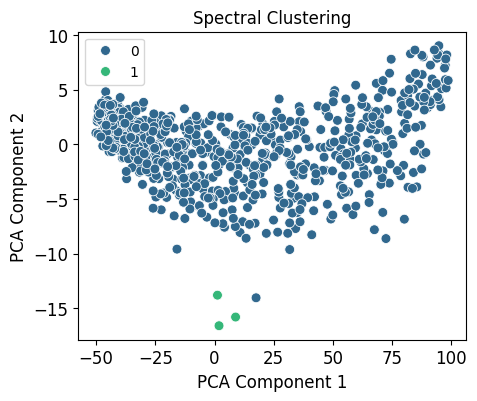

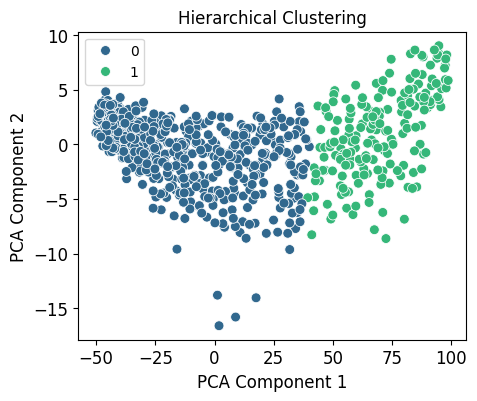

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(title)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.legend(loc='best')
    plt.show()

# Plot KMeans clusters
plot_clusters(pca_data, kmeans_clusters, 'KMeans Clustering')

# Plot GMM clusters
plot_clusters(pca_data, gmm_clusters, 'GMM Clustering')

# Plot DBSCAN clusters
plot_clusters(pca_data, dbscan_clusters, 'DBSCAN Clustering')

# Plot Spectral Clustering clusters
plot_clusters(pca_data, spectral_clusters, 'Spectral Clustering')

# Plot Hierarchical Clustering clusters
plot_clusters(pca_data, hca_clusters, 'Hierarchical Clustering')
